In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import load_model

import gzip
import cv2

tf.__version__

'2.2.0'

### Importing the dataset 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Shape of x_train = "+str(x_train.shape))
print("Shape of y_train = "+str(y_train.shape))
print("Shape of x_test = "+str(x_test.shape))
print("Shape of y_test = "+str(y_test.shape))

Shape of x_train = (60000, 28, 28)
Shape of y_train = (60000,)
Shape of x_test = (10000, 28, 28)
Shape of y_test = (10000,)


### Printing random images from the dataset 

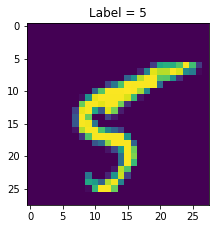

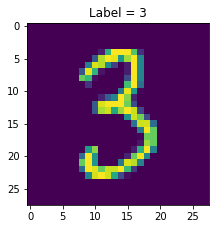

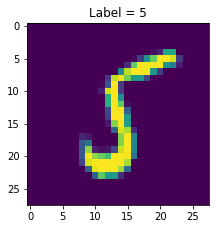

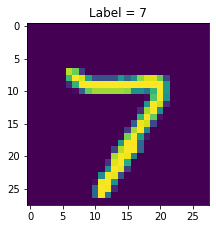

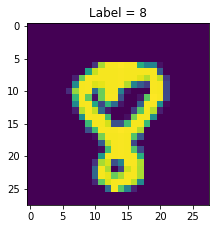

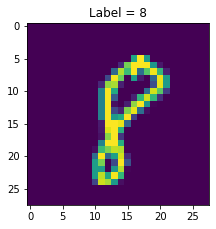

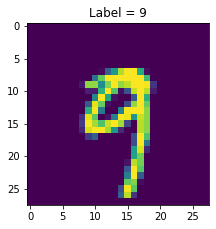

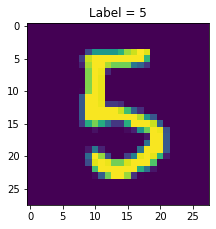

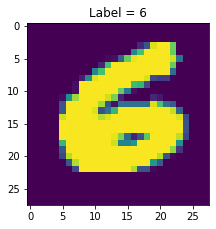

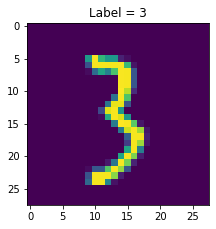

In [4]:
r = np.random.randint(1, 60000, 10)
for i in range(r.shape[0]):
    plt.figure(figsize = (15, 15))
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[r[i]])
    plt.title('Label = '+str(y_train[r[i]]))

## Building the Model 

#### Adding layers

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), padding = 'VALID', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding = 'VALID', activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(800, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)), 
    Dense(500, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),            
    Dense(500, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               1280800   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4

#### Compiling the model

In [9]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#### Fitting the dataset to the model 

In [10]:
history = model.fit(x_train[..., np.newaxis], y_train, batch_size = 64, epochs = 15, validation_split = 0.2)

Epoch 1/15
750/750 [==============================] - 54s 72ms/step - loss: 1.9905 - accuracy: 0.9385 - val_loss: 1.0939 - val_accuracy: 0.9843
Epoch 2/15
750/750 [==============================] - 60s 79ms/step - loss: 0.8877 - accuracy: 0.9819 - val_loss: 0.7253 - val_accuracy: 0.9822
Epoch 3/15
750/750 [==============================] - 62s 82ms/step - loss: 0.5932 - accuracy: 0.9845 - val_loss: 0.4985 - val_accuracy: 0.9829
Epoch 4/15
750/750 [==============================] - 63s 84ms/step - loss: 0.4094 - accuracy: 0.9861 - val_loss: 0.3583 - val_accuracy: 0.9818
Epoch 5/15
750/750 [==============================] - 64s 85ms/step - loss: 0.2897 - accuracy: 0.9868 - val_loss: 0.2518 - val_accuracy: 0.9847
Epoch 6/15
750/750 [==============================] - 63s 84ms/step - loss: 0.2086 - accuracy: 0.9875 - val_loss: 0.2334 - val_accuracy: 0.9754
Epoch 7/15
750/750 [==============================] - 63s 84ms/step - loss: 0.1525 - accuracy: 0.9892 - val_loss: 0.1534 - val_accuracy:

#### Evaluating test set

In [44]:
loss, accuracy = model.evaluate(x_test[..., np.newaxis], y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0800 - accuracy: 0.9867


#### Prediction on test set

In [45]:
y_test_pred = model.predict(x_test[..., np.newaxis])

#### Saving and Loading Model

In [13]:
model.save('MNIST_digit.h5')

In [42]:
model = load_model('MNIST_digit.h5')

### Testing random image

Prediction = 7


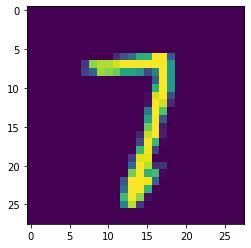

Ground Truth = 7


In [47]:
image_no = 234
predicted_label = np.argmax(y_test_pred[image_no])
plt.imshow(x_test[image_no])
print('Prediction = '+str(predicted_label))
plt.show()
print('Ground Truth = '+str(y_test[image_no]))

## Analysis

In [48]:
log = pd.DataFrame(history.history)
log.head()

NameError: name 'history' is not defined

In [49]:
loss_plot = log.plot(y = 'loss', title = 'Loss vs Epoch')
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

loss_plot = log.plot(y = 'loss', title = 'Loss vs Epoch')
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

NameError: name 'log' is not defined

NameError: name 'history' is not defined

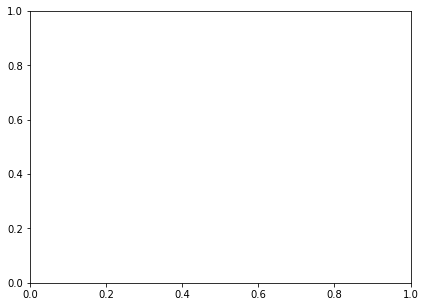

In [50]:
fig = plt.figure(figsize = (15, 5))
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

Prediction = 3


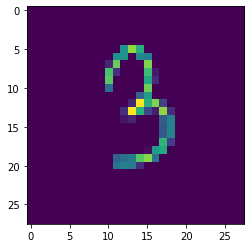

In [52]:
#Importing image
my_image = 'number_3.jpg'
image = 'images/' + my_image
my_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

resized_image = cv2.resize(my_image, (28, 28), interpolation = cv2.INTER_AREA)

#Converting image to numpy array
img = np.array(resized_image)

#Converting image from white background to black background
inv_img = 255-img
plt.imshow(inv_img)

#Standarizing the image
#img_std = img_flatten/255
#Check image size (12288, 1)

#Make prediciton
prediction = model.predict(inv_img[np.newaxis, ..., np.newaxis])
#prediction
prediction = np.argmax(prediction)
print('Prediction = '+str(prediction))